In [71]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats

In [72]:
# Load the data from JHU
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
df_d = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [73]:
df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
df_d = df_d.drop(['Population', 'UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)

In [74]:
NY = df[(df["Province_State"] == "New York")]
NY_d = df_d[(df_d["Province_State"] == "New York")]

NJ = df[(df["Province_State"] == "New Jersey")]
NJ_d = df_d[(df_d["Province_State"] == "New Jersey")]

MA = df[(df["Province_State"] == "Massachusetts")]
MA_d = df_d[(df_d["Province_State"] == "Massachusetts")]

MI = df[(df["Province_State"] == "Michigan")]
MI_d = df_d[(df_d["Province_State"] == "Michigan")]

PA = df[(df["Province_State"] == "Pennsylvania")]
PA_d = df_d[(df_d["Province_State"] == "Pennsylvania")]

CA = df[(df["Province_State"] == "California")]
CA_d = df_d[(df_d["Province_State"] == "California")]

IL = df[(df["Province_State"] == "Illinois")]
IL_d = df_d[(df_d["Province_State"] == "Illinois")]

LA = df[(df["Province_State"] == "Louisiana")]
LA_d = df_d[(df_d["Province_State"] == "Louisiana")]

TX = df[(df["Province_State"] == "Texas")]
TX_d = df_d[(df_d["Province_State"] == "Texas")]

GA = df[(df["Province_State"] == "Georgia")]
GA_d = df_d[(df_d["Province_State"] == "Georgia")]

FL = df[(df["Province_State"] == "Florida")]
FL_d = df_d[(df_d["Province_State"] == "Florida")]

CT = df[(df["Province_State"] == "Connecticut")]
CT_d = df_d[(df_d["Province_State"] == "Connecticut")]

In [75]:
NY = NY.drop(['Province_State'], axis=1)
NY_d = NY_d.drop(['Province_State'], axis=1)

NJ = NJ.drop(['Province_State'], axis=1)
NJ_d = NJ_d.drop(['Province_State'], axis=1)

MA = MA.drop(['Province_State'], axis=1)
MA_d = MA_d.drop(['Province_State'], axis=1)

MI = MI.drop(['Province_State'], axis=1)
MI_d = MI_d.drop(['Province_State'], axis=1)

PA = PA.drop(['Province_State'], axis=1)
PA_d = PA_d.drop(['Province_State'], axis=1)

CA = CA.drop(['Province_State'], axis=1)
CA_d = CA_d.drop(['Province_State'], axis=1)

IL = IL.drop(['Province_State'], axis=1)
IL_d = IL_d.drop(['Province_State'], axis=1)

LA = LA.drop(['Province_State'], axis=1)
LA_d = LA_d.drop(['Province_State'], axis=1)

TX = TX.drop(['Province_State'], axis=1)
TX_d = TX_d.drop(['Province_State'], axis=1)

GA = GA.drop(['Province_State'], axis=1)
GA_d = GA_d.drop(['Province_State'], axis=1)

FL = FL.drop(['Province_State'], axis=1)
FL_d = FL_d.drop(['Province_State'], axis=1)

CT = CT.drop(['Province_State'], axis=1)
CT_d = CT_d.drop(['Province_State'], axis=1)

In [76]:
def daily_DF(df):
    # this cell by Leaf Petersen
    # Copy the data frame
    dfdaily=df.copy()

    # We are on the first iteration
    first=True
    # For every column
    for column in df:
       # If this is the first iteration
       if first:
         # Save the first column
         prev = column
         # Copy over the first column unchanged
         dfdaily[column]=df[column]
         # All subsequent iterations are not the first
         first=False
         # Skip the rest of the loop
         continue
       # We are not the first iteration, so keep going
       # Set the new column contents to the difference of the
       # previous column and the current column
       dfdaily[column] = df[column]-df[prev]
       # The current column is the previous column for the next iteration
       prev = column
        
    # We only want the totals
    dfdaily = dfdaily.sum().to_frame()
    dfdaily = dfdaily.reset_index()
    # Negatives into positives
    dfdaily[0] = dfdaily[0].abs()
    
    return(dfdaily)

In [77]:
NY = daily_DF(NY)
NY = NY.rename(columns={'index': 'Date', 0: 'Confirmed'})

NY_d = daily_DF(NY_d)
NY_d = NY_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [78]:
NJ = daily_DF(NJ)
NJ = NJ.rename(columns={'index': 'Date', 0: 'Confirmed'})

NJ_d = daily_DF(NJ_d)
NJ_d = NJ_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [79]:
MA = daily_DF(MA)
MA = MA.rename(columns={'index': 'Date', 0: 'Confirmed'})

MA_d = daily_DF(MA_d)
MA_d = MA_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [80]:
MI = daily_DF(MI)
MI = MI.rename(columns={'index': 'Date', 0: 'Confirmed'})

MI_d = daily_DF(MI_d)
MI_d = MI_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [81]:
PA = daily_DF(PA)
PA = PA.rename(columns={'index': 'Date', 0: 'Confirmed'})

PA_d = daily_DF(PA_d)
PA_d = PA_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [82]:
CA = daily_DF(CA)
CA = CA.rename(columns={'index': 'Date', 0: 'Confirmed'})

CA_d = daily_DF(CA_d)
CA_d = CA_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [83]:
IL = daily_DF(IL)
IL = IL.rename(columns={'index': 'Date', 0: 'Confirmed'})

IL_d = daily_DF(IL_d)
IL_d = IL_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [84]:
LA = daily_DF(LA)
LA = LA.rename(columns={'index': 'Date', 0: 'Confirmed'})

LA_d = daily_DF(LA_d)
LA_d = LA_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [85]:
TX = daily_DF(TX)
TX = TX.rename(columns={'index': 'Date', 0: 'Confirmed'})

TX_d = daily_DF(TX_d)
TX_d = TX_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [86]:
GA = daily_DF(GA)
GA = GA.rename(columns={'index': 'Date', 0: 'Confirmed'})

GA_d = daily_DF(GA_d)
GA_d = GA_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [87]:
FL = daily_DF(FL)
FL = FL.rename(columns={'index': 'Date', 0: 'Confirmed'})

FL_d = daily_DF(FL_d)
FL_d = FL_d.rename(columns={'index': 'Date', 0: 'Deaths'})

In [88]:
CT = daily_DF(CT)
CT = CT.rename(columns={'index': 'Date', 0: 'Confirmed'})

CT_d = daily_DF(CT_d)
CT_d = CT_d.rename(columns={'index': 'Date', 0: 'Deaths'})

This is the format of your plot grid:
[ (1,1) x,y     ]  [ (1,2) x2,y2   ]  [ (1,3) x3,y3   ]
[ (2,1) x4,y4   ]  [ (2,2) x5,y5   ]  [ (2,3) x6,y6   ]
[ (3,1) x7,y7   ]  [ (3,2) x8,y8   ]  [ (3,3) x9,y9   ]
[ (4,1) x10,y10 ]  [ (4,2) x11,y11 ]  [ (4,3) x12,y12 ]



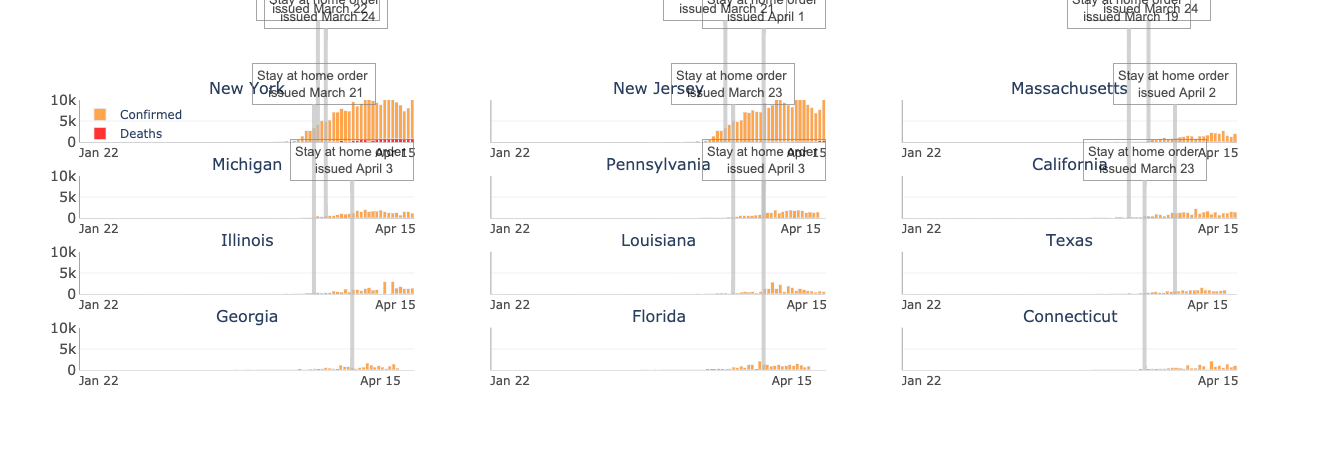

In [164]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(rows=4, cols=3,
                    subplot_titles=("New York", "New Jersey", "Massachusetts", "Michigan", "Pennsylvania", "California",
                                    "Illinois", "Louisiana", "Texas", "Georgia", "Florida", "Connecticut"),
                    shared_yaxes=True,
                    print_grid=True
                   )

fig.add_trace(go.Bar(x = NY_d['Date'], y = NY_d['Deaths'],
              name='Deaths ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333'
                    ),
              row=1, col=1
             )

fig.add_trace(go.Bar(x = NY['Date'], y = NY['Confirmed'],
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d'
                    ),
              row=1, col=1
             )

fig.add_trace(go.Bar(x = NJ_d['Date'], y = NJ_d['Deaths'],
              #name='Deaths ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=1, col=2
             )

fig.add_trace(go.Bar(x = NY['Date'], y = NY['Confirmed'],
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=1, col=2
             )

fig.add_trace(go.Bar(x = MA_d['Date'], y = MA_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=1, col=3
             )

fig.add_trace(go.Bar(x = MA['Date'], y = MA['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=1, col=3
             )

fig.add_trace(go.Bar(x = MI_d['Date'], y = MI_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=2, col=1
             )

fig.add_trace(go.Bar(x = MI['Date'], y = MI['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=2, col=1
             )

fig.add_trace(go.Bar(x = PA_d['Date'], y = PA_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=2, col=2
             )

fig.add_trace(go.Bar(x = PA['Date'], y = PA['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=2, col=2
             )

fig.add_trace(go.Bar(x = CA_d['Date'], y = CA_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=2, col=3
             )

fig.add_trace(go.Bar(x = CA['Date'], y = CA['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=2, col=3
             )

fig.add_trace(go.Bar(x = IL_d['Date'], y = IL_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=3, col=1
             )

fig.add_trace(go.Bar(x = IL['Date'], y = IL['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=3, col=1
             )

fig.add_trace(go.Bar(x = LA_d['Date'], y = LA_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=3, col=2
             )

fig.add_trace(go.Bar(x = LA['Date'], y = LA['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=3, col=2
             )

fig.add_trace(go.Bar(x = TX_d['Date'], y = TX_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=3, col=3
             )

fig.add_trace(go.Bar(x = TX['Date'], y = TX['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=3, col=3
             )

fig.add_trace(go.Bar(x = GA_d['Date'], y = GA_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=4, col=1
             )

fig.add_trace(go.Bar(x = GA['Date'], y = GA['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=4, col=1
             )

fig.add_trace(go.Bar(x = FL_d['Date'], y = FL_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=4, col=2
             )

fig.add_trace(go.Bar(x = FL['Date'], y = FL['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=4, col=2
             )

fig.add_trace(go.Bar(x = CT_d['Date'], y = CT_d['Deaths'],
              #hovertext='Deaths',
              name='Deaths ',
              #opacity=.5,
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff3333', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Deaths: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ff3333',
              showlegend=False
                    ),
              row=4, col=3
             )

fig.add_trace(go.Bar(x = CT['Date'], y = CT['Confirmed'],
              #hovertext='Positive cases',
              name='Confirmed ',
              textposition='outside',
              hoverlabel=dict(bgcolor='#ff8000', bordercolor='white',
                font=dict(family='Arial', size=20, color='white')
                             ),
              hovertemplate = 'Confirmed: <br> <b>%{y:,.0f}</b><extra></extra>',
              marker_color='#ffa64d',
              showlegend=False
                    ),
              row=4, col=3
             )

fig.add_annotation(
        x=NY.at[60,'Date'],
        y=NY.index.min(),
        xref="x",
        yref="y",
        text="Stay at home order <br> issued March 22",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=NY.at[59,'Date'],
        y=NJ.index.min(),
        xref="x2",
        yref="y2",
        text="Stay at home order <br> issued March 21",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=MA.at[62,'Date'],
        y=MA.index.min(),
        xref="x3",
        yref="y3",
        text="Stay at home order <br> issued March 24",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=MI.at[62,'Date'],
        y=MI.index.min(),
        xref="x4",
        yref="y4",
        text="Stay at home order <br> issued March 24",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=PA.at[70,'Date'],
        y=PA.index.min(),
        xref="x5",
        yref="y5",
        text="Stay at home order <br> issued April 1",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=PA.at[57,'Date'],
        y=PA.index.min(),
        xref="x6",
        yref="y6",
        text="Stay at home order <br> issued March 19",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=IL.at[59,'Date'],
        y=IL.index.min(),
        xref="x7",
        yref="y7",
        text="Stay at home order <br> issued March 21",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=LA.at[61,'Date'],
        y=LA.index.min(),
        xref="x8",
        yref="y8",
        text="Stay at home order <br> issued March 23",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=TX.at[71,'Date'],
        y=TX.index.min(),
        xref="x9",
        yref="y9",
        text="Stay at home order <br> issued April 2",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=GA.at[72,'Date'],
        y=GA.index.min(),
        xref="x10",
        yref="y10",
        text="Stay at home order <br> issued April 3",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=FL.at[72,'Date'],
        y=FL.index.min(),
        xref="x11",
        yref="y11",
        text="Stay at home order <br> issued April 3",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.add_annotation(
        x=CT.at[61,'Date'],
        y=CT.index.min(),
        xref="x12",
        yref="y12",
        text="Stay at home order <br> issued March 23",
        showarrow=True,
        font=dict(
            family="Arial",
            size=13,
            color="black"
            ),
        align="center",
        #arrowhead=2,
        arrowsize=1,
        arrowwidth=4,
        arrowcolor="#bfbfbf",
        ax=0,
        ay=-210,
        bordercolor="#808080",
        borderwidth=1,
        borderpad=4,
        opacity=0.7
        )

fig.update_layout(barmode='stack',
                  paper_bgcolor='rgba(0,0,0,0)', 
                  plot_bgcolor='rgba(0,0,0,0)',
                  uniformtext_minsize=7, uniformtext_mode='hide',
                  hovermode='x', #sets the bar chart to display both tooltips by default
                  legend=dict(x=0, y=1),
                  #font=dict(size = 12),
                  dragmode=False, #disable panning so mobile apps can receive pinch to zoom events
                  yaxis = dict(
                      scaleanchor = "x",
                      scaleratio = 1,
                              )
                 )
                 
                     
fig.update_xaxes(showline=True, linewidth=0.5, linecolor='#a6a6a6', color='#4d4d4d',
                #showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                fixedrange=True,
                #tickfont = dict(size = 10),
#                 tickmode='auto',
#                 nticks=2,
                tickmode = 'array',
                tickvals = [NY.index.min(), NY.index.max()], #gets the first and last date
                ticktext = ['        Jan 22', 'Apr 15        '] #manually sets the text
#                 tickmode = 'linear',
#                 tick0 = NY.Date[0],
#                 dtick = 86400000.0 * 15
                )
              
fig.update_yaxes(showline=True, linewidth=1, linecolor='#a6a6a6', color='#4d4d4d',
                 showgrid=True, gridwidth=1, gridcolor='#f2f2f2',
                 fixedrange=True,
                 tickfont = dict(size = 14),
                 range=(0, 10000)
                )


fig.update_traces(texttemplate='%{y:,.2s}', textposition='outside')


    
# fig.add_trace(go.Scatter(x = dfdaily['Date'], y = dfdaily_avg['Confirmed'],
#                     mode='lines',
#                     name='',
#                     line=dict(color=' #e67300', width=2),
#                     showlegend=False,
#                     hoverinfo='skip'
#                         )
#              )


fig.show(displayModeBar=False)

import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)

In [160]:
x = PA.at[71,'Date']
print(x)

4/2/20
